In [ ]:
import hashlib
from PIL import Image

# Open the image file
image_file = Image.open("/content/bwimages.jpg")

# Convert the image to bytes
image_bytes = image_file.tobytes()

# Generate the hash object using SHA-512 algorithm
hash_object = hashlib.sha512()

# Update the hash object with the image bytes
hash_object.update(image_bytes)

# Generate the hash value in hexadecimal format
hash_hex = hash_object.hexdigest()

# Print the hash value
print("SHA-512 hash value:", hash_hex)

SHA-512 hash value: 78fbb4e8dec24ba51417b644826d364b5bbc193020a93cb8517ed977f7e4664e8bb1e97ac81e631c82557c0e52937ce3b0311967bd86fcc8e0bdb317e1297553


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#DIVIDING INTO 4 PARTS
import textwrap
prekeys=textwrap.wrap(hash_hex, 32)
prekeys

['78fbb4e8dec24ba51417b644826d364b',
 '5bbc193020a93cb8517ed977f7e4664e',
 '8bb1e97ac81e631c82557c0e52937ce3',
 'b0311967bd86fcc8e0bdb317e1297553']

In [ ]:
keys=[]
for i in prekeys:
  dec_value = int(i, 16)
  print(dec_value)
  keys.append(dec_value%0.9999)
keys

160814295289285068105211290932550121035
121936410299131899524719145311206139470
185686463487271186182376685129000254691
234199065083610087103814780686917268819


[0.4461972313840683,
 0.6411861436637232,
 0.6151856149954926,
 0.7820163472457753]

In [ ]:
!pip install cryptography

In [ ]:
from cryptography.hazmat.primitives.asymmetric import ec
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from cryptography.hazmat.primitives import serialization

# Key generation
private_key_person1 = ec.generate_private_key(ec.SECP256R1())
private_key_person2 = ec.generate_private_key(ec.SECP256R1())

# Key exchange
public_key_person1 = private_key_person1.public_key()
public_key_person2 = private_key_person2.public_key()

#this is used in encryption
shared_secret_person1 = private_key_person1.exchange(ec.ECDH(), public_key_person2)

#this is used in decryption
shared_secret_person2 = private_key_person2.exchange(ec.ECDH(), public_key_person1)

print(shared_secret_person1)
print(shared_secret_person2)
key_hash1 = hashlib.sha256(shared_secret_person1).digest()
key_hash2 = hashlib.sha256(shared_secret_person2).digest()


b'\x9c\x9a\xd5\x00"w_(p\xd3\x9b\xb5\xe9z4\xbbk\x7f\x96\x92)8\xbd\xd6\x1f\xca\x9d\x8c\xcc\xc7W\xda'
b'\x9c\x9a\xd5\x00"w_(p\xd3\x9b\xb5\xe9z4\xbbk\x7f\x96\x92)8\xbd\xd6\x1f\xca\x9d\x8c\xcc\xc7W\xda'


In [ ]:
# Encrypting keys
en=[]
for i in keys:0
  original_value = i
  value_bytes = bytes(str(original_value), 'utf-8')
  encrypted_value = bytes([value_bytes[i] ^ key_hash1[i % len(key_hash1)] for i in range(len(value_bytes))])
  en.append(encrypted_value)
  # Decrypt the encrypted value.
  00
  # decrypted_value_bytes = bytes([encrypted_value[i] ^ key_hash2[i % len(key_hash2)] for i in range(len(encrypted_value))])
  # decrypted_value = float(decrypted_value_bytes.decode('utf-8'))
  # Output the results
  print(en)
  # print(encrypted_value)
  print(f"Original value: {original_value}")
  print(f"Encrypted value: {encrypted_value}")
  # print(f"decrypted value: {decrypted_value}")

[b'\xe2\x13hF\x9a\xedX\xbd\x9d\xef)\xa3\xb4d\x81\x00\xc6\xbb']
Original value: 0.4461972313840683
Encrypted value: b'\xe2\x13hF\x9a\xedX\xbd\x9d\xef)\xa3\xb4d\x81\x00\xc6\xbb'
[b'\xe2\x13hF\x9a\xedX\xbd\x9d\xef)\xa3\xb4d\x81\x00\xc6\xbb', b'\xe2\x13jF\x9d\xedY\xbc\x9e\xe8+\xa6\xbac\x86\x04\xcd\xba']
Original value: 0.6411861436637232
Encrypted value: b'\xe2\x13jF\x9d\xedY\xbc\x9e\xe8+\xa6\xbac\x86\x04\xcd\xba'
[b'\xe2\x13hF\x9a\xedX\xbd\x9d\xef)\xa3\xb4d\x81\x00\xc6\xbb', b'\xe2\x13jF\x9d\xedY\xbc\x9e\xe8+\xa6\xbac\x86\x04\xcd\xba', b'\xe2\x13jC\x99\xedY\xbf\x99\xed,\xa9\xb5e\x85\x0f\xcc\xbe']
Original value: 0.6151856149954926
Encrypted value: b'\xe2\x13jC\x99\xedY\xbf\x99\xed,\xa9\xb5e\x85\x0f\xcc\xbe'
[b'\xe2\x13hF\x9a\xedX\xbd\x9d\xef)\xa3\xb4d\x81\x00\xc6\xbb', b'\xe2\x13jF\x9d\xedY\xbc\x9e\xe8+\xa6\xbac\x86\x04\xcd\xba', b'\xe2\x13jC\x99\xedY\xbf\x99\xed,\xa9\xb5e\x85\x0f\xcc\xbe', b'\xe2\x13kJ\x9e\xecP\xbc\x9c\xe8/\xa2\xb8e\x86\x01\xcb\xbb']
Original value: 0.7820163472457753
En

In [ ]:
#GENERATING KEYSTREAMS USING LOGISTIC CHAOTIC MAP
import numpy as np
import cv2
image=cv2.imread('/content/bwimages.jpg')
flat_image = image.flatten()
height,width,c=image.shape

def logistic_map(x, r):
    """
    Generate key stream values using the logistic map.
    """
    key_stream = []
    for i in range(height):
        x = r * x * (1 - x)
        key_stream.append(int(np.round(x * height - 1))%height)
    return key_stream

# Set the initial value and parameters for the logistic map

r = 3.99

# Generate the key stream using the logistic map
key_stream1 = logistic_map(keys[0], r)
key_stream2 = logistic_map(keys[1], r)
key_stream3 = logistic_map(keys[2], r)
key_stream4 = logistic_map(keys[3], r)

# Print the first 10 values of the key stream1
print(key_stream1)

[326, 17, 68, 217, 297, 121, 306, 90, 262, 217, 298, 119, 305, 95, 272, 193, 321, 39, 140, 323, 31, 116, 301, 107, 290, 141, 323, 29, 107, 290, 142, 324, 26, 99, 278, 176, 329, 8, 35, 128, 314, 63, 205, 311, 75, 233, 275, 184, 326, 19, 75, 232, 276, 183, 326, 17, 67, 216, 299, 114, 299, 114, 299, 113, 298, 117, 303, 102, 282, 166, 330, 2, 12, 50, 171, 330, 4, 18, 72, 226, 285, 156, 329, 6, 26, 98, 276, 182, 327, 16, 63, 204, 312, 72, 225, 287, 153, 328, 10, 40, 143, 324, 25, 95, 272, 194, 320, 40, 143, 324, 25, 93, 268, 203, 313, 68, 218, 297, 122, 308, 85, 253, 237, 267, 205, 311, 74, 231, 277, 179, 328, 11, 45, 157, 329, 5, 23, 87, 258, 227, 284, 161, 330, 3, 15, 61, 201, 315, 60, 199, 316, 55, 184, 326, 19, 74, 231, 277, 178, 328, 11, 44, 153, 328, 9, 39, 138, 322, 35, 128, 314, 64, 207, 309, 79, 242, 258, 225, 286, 153, 329, 9, 36, 131, 316, 55, 185, 325, 21, 83, 248, 247, 250, 243, 257, 228, 282, 165, 330, 2, 12, 49, 169, 330, 3, 15, 58, 193, 321, 38, 135, 319, 44, 154, 329, 8, 35

In [ ]:
# Print the first 10 values of the key stream1
print(key_stream1[:5])
# Print the first 10 values of the key stream2
print(key_stream2[:5])

[326, 17, 68, 217, 297]
[304, 99, 277, 178, 328]


In [ ]:
from PIL import Image
import numpy as np

image = Image.open('/content/bwimages.jpg')
image_array = np.array(image)


In [ ]:
#GENERATING PERMUTATION SEQUENCE

key = np.array(key_stream1[:5]) # replace with your float array key
num_rows = image_array.shape[0]
permutation_indices = np.random.RandomState(seed=key).permutation(num_rows)

In [ ]:
#ROW PERMUTATION

permuted_image_array = image_array[permutation_indices, :]

In [ ]:
permuted_image = Image.fromarray(permuted_image_array)
permuted_image.save('1_permuted_image.png')

In [ ]:
from PIL import Image
import numpy as np

image = Image.open('/content/1_permuted_image.png')
image_array = np.array(image)

In [ ]:
#GENERATING PERMUTATION SEQUENCE

key = np.array(key_stream2[:5]) # replace with your float array key
num_cols = image_array.shape[1]
print(num_cols)
permutation_indices = np.random.RandomState(seed=key).permutation(num_cols)

593


In [ ]:
##COLUMN PERMUTATION

permuted_image_array = image_array[:,permutation_indices]

In [ ]:
permuted_image = Image.fromarray(permuted_image_array)
permuted_image.save('2_col_permuted_image.png')

In [ ]:
#DCT
import cv2
import numpy as np

# Load image
img = cv2.imread('2_col_permuted_image.png')

# Split image into channels
b, g, r = cv2.split(img)

# Define DCT function
def dct2(block):
    return cv2.dct(cv2.dct(block.T).T)



# Perform DCT on each channel
dct_b = dct2(b.astype(np.float32))
dct_g = dct2(g.astype(np.float32))
dct_r = dct2(r.astype(np.float32))

dct_img = cv2.merge((dct_b,dct_g,dct_r))
cv2.imwrite('3_dct_image.png', dct_img)

True

In [ ]:
#GENERATING SUBSTITUTION BOX

import numpy as np
from PIL import Image

# Load the image data from a file
image = np.array(Image.open("3_dct_image.png"))

# Calculate the size of the substitution box needed
sbox_size = image.shape[0] * image.shape[1] * image.shape[2]

# Generate a random substitution box with the required size
sbox = np.arange(sbox_size, dtype=np.uint8)
np.random.shuffle(sbox)

# Reshape the substitution box to match the input image shape
sbox = sbox.reshape(image.shape)

In [ ]:
image_array = np.array(sbox)
key3 = np.array(key_stream3[:5])
num_rows = image_array.shape[0]
permutation_indices1 = np.random.RandomState(seed=key3).permutation(num_rows)
sbox_row_permuted = image_array[permutation_indices1, :]

In [ ]:
image_array = sbox_row_permuted
key4 = np.array(key_stream4[:5])
num_columns = image_array.shape[1]
permutation_indices2 = np.random.RandomState(seed=key4).permutation(num_columns)
sbox_permuted = image_array[:,permutation_indices2, :]

In [ ]:
#PERFORMING BITWISE XOR
imgforps = Image.open("/content/3_dct_image.png")
img_array = np.array(imgforps)
encrypted_array = np.bitwise_xor(img_array, sbox)
encrypted_img = Image.fromarray(encrypted_array)
encrypted_img.save("4_final_encrypted_img.png")

In [ ]:
#DECRYPTING KEYS USING ELLIPTIC CURVE CRYPTOGRAPHY
en_len = len(en)
dkeys=[]
print(en_len)
for i in range(en_len):
  a=en[i]
  decrypted_value_bytes = bytes([a[i] ^ key_hash2[i % len(key_hash2)] for i in range(len(a))])
  decrypted_value = float(decrypted_value_bytes.decode('utf-8'))
  dkeys.append(decrypted_value)
  # Output the results
  print(f"decrypted value: {decrypted_value}")
print(dkeys)

4
decrypted value: 0.4461972313840683
decrypted value: 0.6411861436637232
decrypted value: 0.6151856149954926
decrypted value: 0.7820163472457753
[0.4461972313840683, 0.6411861436637232, 0.6151856149954926, 0.7820163472457753]


In [ ]:
#keystream generation using logistic chaotic map

In [ ]:
d_image=cv2.imread('/content/4_final_encrypted_img.png')

In [ ]:
d_flat_image = d_image.flatten()
d_height,d_width,d_c=d_image.shape

def d_logistic_map(x, r):
    """
    Generate key stream values using the logistic map.
    """
    d_key_stream = []
    for i in range(d_height):
        x = r * x * (1 - x)
        d_key_stream.append(int(np.round(x * d_height - 1))%d_height)
    return d_key_stream

# Set the initial value and parameters for the logistic map

r = 3.99

# Generate the key stream using the logistic map
d_key_stream1 = d_logistic_map(dkeys[0], r)
d_key_stream2 = d_logistic_map(dkeys[1], r)
d_key_stream3 = d_logistic_map(dkeys[2], r)
d_key_stream4 = d_logistic_map(dkeys[3], r)

# Print the first 10 values of the key stream
print(d_key_stream1[:10])

[326, 17, 68, 217, 297, 121, 306, 90, 262, 217]


In [ ]:
dkey3 = np.array(d_key_stream3[:5]) # replace with your float array key
num_rows1 = sbox_permuted.shape[0]
re_permutation_indices3 = np.random.RandomState(seed=dkey3).permutation(num_rows1)

In [ ]:
dkey4 = np.array(d_key_stream4[:5]) # replace with your float array key
num_cols1 = sbox_permuted.shape[1]
re_permutation_indices4 = np.random.RandomState(seed=dkey4).permutation(num_cols1)

In [ ]:
import numpy as np
inverse_indices3 = np.argsort(re_permutation_indices3)
inverse_indices4 = np.argsort(re_permutation_indices4)

In [ ]:
sbox_decrept = sbox_permuted[:,inverse_indices4, :]
sbox_dpermuted = sbox_decrept[inverse_indices3, :]
print(sbox_dpermuted)

[[[192  26 242]
  [184  46 163]
  [248  37 170]
  ...
  [193   1  74]
  [251 232 160]
  [101  88 161]]

 [[251 101  35]
  [254 176 233]
  [206 223  41]
  ...
  [235 182 114]
  [140 200 108]
  [245 198 237]]

 [[196 143 131]
  [112 204 192]
  [118 199 174]
  ...
  [249 121 113]
  [ 41 238 123]
  [226 194 177]]

 ...

 [[119  45   5]
  [152 104 243]
  [217 128  51]
  ...
  [160  83  21]
  [185 112   2]
  [ 42 141  29]]

 [[ 39 129 119]
  [249  34 109]
  [ 42 209 129]
  ...
  [142  46 154]
  [240 131 183]
  [127   1  41]]

 [[152  97 250]
  [230 100  32]
  [248 117  23]
  ...
  [163 241 234]
  [249  73 233]
  [179  72  68]]]


In [ ]:
#pixel substitution on decrypted image
deimgforps = Image.open("/content/4_final_encrypted_img.png")
deimg_array = np.array(deimgforps)
decrypted_array = np.bitwise_xor(deimg_array, sbox_dpermuted)
decrypted_img = Image.fromarray(decrypted_array)
decrypted_img.save("5_decrypted_image_from_ps.png")

In [ ]:
#IDCT on decyrpted image grom pixel substitution
import cv2
import numpy as np

# Load image
img = cv2.imread('5_decrypted_image_from_ps.png')

# Split image into channels
b, g, r = cv2.split(img)

# Define IDCT function
def idct2(block):
    return cv2.idct(cv2.idct(block.T).T)

idct_b = idct2(dct_b).astype(np.uint8)
idct_g = idct2(dct_g).astype(np.uint8)
idct_r = idct2(dct_r).astype(np.uint8)

idct_img = cv2.merge((idct_b, idct_g, idct_r))
cv2.imwrite('6_idct_image.png', idct_img)

True

In [ ]:
# Print the first 10 values of the key stream1 using decrypted value
print(d_key_stream1[:10])
# Print the first 10 values of the key stream2 using decrypted value
print(d_key_stream2[:10])

[326, 17, 68, 217, 297, 121, 306, 90, 262, 217]
[304, 99, 277, 178, 328, 11, 44, 154, 329, 8]


In [ ]:
# Print all the values of the key stream
print(d_key_stream1)

[326, 17, 68, 217, 297, 121, 306, 90, 262, 217, 298, 119, 305, 95, 272, 193, 321, 39, 140, 323, 31, 116, 301, 107, 290, 141, 323, 29, 107, 290, 142, 324, 26, 99, 278, 176, 329, 8, 35, 128, 314, 63, 205, 311, 75, 233, 275, 184, 326, 19, 75, 232, 276, 183, 326, 17, 67, 216, 299, 114, 299, 114, 299, 113, 298, 117, 303, 102, 282, 166, 330, 2, 12, 50, 171, 330, 4, 18, 72, 226, 285, 156, 329, 6, 26, 98, 276, 182, 327, 16, 63, 204, 312, 72, 225, 287, 153, 328, 10, 40, 143, 324, 25, 95, 272, 194, 320, 40, 143, 324, 25, 93, 268, 203, 313, 68, 218, 297, 122, 308, 85, 253, 237, 267, 205, 311, 74, 231, 277, 179, 328, 11, 45, 157, 329, 5, 23, 87, 258, 227, 284, 161, 330, 3, 15, 61, 201, 315, 60, 199, 316, 55, 184, 326, 19, 74, 231, 277, 178, 328, 11, 44, 153, 328, 9, 39, 138, 322, 35, 128, 314, 64, 207, 309, 79, 242, 258, 225, 286, 153, 329, 9, 36, 131, 316, 55, 185, 325, 21, 83, 248, 247, 250, 243, 257, 228, 282, 165, 330, 2, 12, 49, 169, 330, 3, 15, 58, 193, 321, 38, 135, 319, 44, 154, 329, 8, 35

In [ ]:
#reversing column permutation on image got from IDCT


In [ ]:
dp_image = Image.open('/content/6_idct_image.png')
dp_image_array = np.array(dp_image)

In [ ]:
dkey = np.array(d_key_stream2[:5]) # replace with your float array key
num_cols1 = dp_image_array.shape[1]
re_permutation_indices = np.random.RandomState(seed=dkey).permutation(num_cols1)

In [ ]:
inverse_indices = np.argsort(re_permutation_indices)

In [ ]:
re_permuted_image_array = dp_image_array[:,inverse_indices, :]

In [ ]:
re_permuted_image = Image.fromarray(re_permuted_image_array)
re_permuted_image.save('7_reverse_col_permuted_image.png')

In [ ]:
#reversing row permutation

In [ ]:
dp_image = Image.open('/content/7_reverse_col_permuted_image.png')
dp_image_array = np.array(dp_image)

In [ ]:
dkey1 = np.array(d_key_stream1[:5]) # replace with your float array key
num_rows1 = dp_image_array.shape[0]
re_permutation_indices = np.random.RandomState(seed=dkey1).permutation(num_rows1)

In [ ]:
inverse_indices = np.argsort(re_permutation_indices)

In [ ]:
re_permuted_image_array = dp_image_array[inverse_indices, :]

In [ ]:
re_permuted_image = Image.fromarray(re_permuted_image_array)
re_permuted_image.save('8_final_decrypted_image.png')

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/4_final_encrypted_img.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def calculate_horizontal_correlation(image):
    horizontal_correlations = np.corrcoef(image[:, :-1], image[:, 1:])
    return horizontal_correlations

def calculate_vertical_correlation(image):
    vertical_correlations = np.corrcoef(image[:-1, :], image[1:, :])
    return vertical_correlations

def calculate_diagonal_correlation(image):
    # Calculate the diagonal correlation coefficients
    diagonal1_correlations = np.corrcoef(image[:-1, :-1], image[1:, 1:])
    diagonal2_correlations = np.corrcoef(image[:-1, 1:], image[1:, :-1])
    return diagonal1_correlations, diagonal2_correlations

# Calculate correlation coefficients
horizontal_correlation = calculate_horizontal_correlation(gray_image)
vertical_correlation = calculate_vertical_correlation(gray_image)
diagonal1_correlation, diagonal2_correlation = calculate_diagonal_correlation(gray_image)


In [ ]:
# Assuming you have a correlation coefficients matrix
correlation_matrix = vertical_correlation
H, W = np.shape(correlation_matrix)

# Calculate S = W x H
S = W * H

# Initialize arrays for M(p) and D(p)
M = np.zeros((H, W))
D = np.zeros((H, W))

# Calculate M(p) and D(p) for each pixel
for y in range(H):
    for x in range(W):
        # Calculate the neighborhood boundaries based on S, you may need to adjust this for your specific needs
        y_start = max(0, y - S // 2)
        y_end = min(H, y + S // 2)
        x_start = max(0, x - S // 2)
        x_end = min(W, x + S // 2)

        # Calculate M(p) for the current pixel
        M[y, x] = np.mean(correlation_matrix[y_start:y_end, x_start:x_end])

        # Calculate D(p) for the current pixel
        D[y, x] = np.std(correlation_matrix[y_start:y_end, x_start:x_end])

# Initialize an array for cov(p1, p2)
cov = np.zeros((H, W))

# Calculate cov(p1, p2) for each pixel pair
for y in range(H):
    for x in range(W - 1):
        cov[y, x] = (correlation_matrix[y][x] * correlation_matrix[y][x + 1])


# Now you have the values of S, M(p), D(p), and cov(p1, p2) for your image
# Now you have the values of S, M(p), D(p), and cov(p1, p2) for your image


In [ ]:
import numpy as np

# Assuming you have calculated covariance (cov) and standard deviations (D) for each pixel pair

# Calculate CCp1_p2 for each pixel pair
CCp1_p2 = cov[:, :-1] / (D[:, :-1] * D[:, 1:])

mean_correlation = np.mean(CCp1_p2)
print(f"vertical Correlation: {mean_correlation}")


vertical Correlation: 0.0014569953983921949


In [ ]:
correlation_matrix = horizontal_correlation
H, W = np.shape(correlation_matrix)

# Calculate S = W x H
S = W * H

# Initialize arrays for M(p) and D(p)
M = np.zeros((H, W))
D = np.zeros((H, W))

# Calculate M(p) and D(p) for each pixel
for y in range(H):
    for x in range(W):
        # Calculate the neighborhood boundaries based on S, you may need to adjust this for your specific needs
        y_start = max(0, y - S // 2)
        y_end = min(H, y + S // 2)
        x_start = max(0, x - S // 2)
        x_end = min(W, x + S // 2)

        # Calculate M(p) for the current pixel
        M[y, x] = np.mean(correlation_matrix[y_start:y_end, x_start:x_end])

        # Calculate D(p) for the current pixel
        D[y, x] = np.std(correlation_matrix[y_start:y_end, x_start:x_end])

# Initialize an array for cov(p1, p2)
cov = np.zeros((H, W))

# Calculate cov(p1, p2) for each pixel pair
for y in range(H):
    for x in range(W - 1):
        cov[y, x] = (correlation_matrix[y][x] * correlation_matrix[y][x + 1])


In [ ]:
import numpy as np

# Assuming you have calculated covariance (cov) and standard deviations (D) for each pixel pair

# Calculate CCp1_p2 for each pixel pair
CCp1_p2 = cov[:, :-1] / (D[:, :-1] * D[:, 1:])

mean_correlation = np.mean(CCp1_p2)
print(f"horizontal Correlation: {mean_correlation}")

horizontal Correlation: 0.0012062637893653432


In [ ]:
correlation_matrix = diagonal1_correlation
H, W = np.shape(correlation_matrix)

# Calculate S = W x H
S = W * H

# Initialize arrays for M(p) and D(p)
M = np.zeros((H, W))
D = np.zeros((H, W))

# Calculate M(p) and D(p) for each pixel
for y in range(H):
    for x in range(W):
        # Calculate the neighborhood boundaries based on S, you may need to adjust this for your specific needs
        y_start = max(0, y - S // 2)
        y_end = min(H, y + S // 2)
        x_start = max(0, x - S // 2)
        x_end = min(W, x + S // 2)

        # Calculate M(p) for the current pixel
        M[y, x] = np.mean(correlation_matrix[y_start:y_end, x_start:x_end])

        # Calculate D(p) for the current pixel
        D[y, x] = np.std(correlation_matrix[y_start:y_end, x_start:x_end])

# Initialize an array for cov(p1, p2)
cov = np.zeros((H, W))

# Calculate cov(p1, p2) for each pixel pair
for y in range(H):
    for x in range(W - 1):
        cov[y, x] = (correlation_matrix[y][x] * correlation_matrix[y][x + 1])


In [ ]:
import numpy as np

# Assuming you have calculated covariance (cov) and standard deviations (D) for each pixel pair

# Calculate CCp1_p2 for each pixel pair
CCp1_p2 = cov[:, :-1] / (D[:, :-1] * D[:, 1:])

mean_correlation = np.mean(CCp1_p2)
print(f"diagonal Correlation: {mean_correlation}")


diagonal Correlation: 0.0016093057864074872


In [ ]:
import cv2
import numpy as np
import scipy.stats

def calculate_correlation(plaintext_image_path, cipher_image_path, direction='vertical'):
    # Read the plaintext and cipher images
    plaintext_image = cv2.imread(plaintext_image_path)
    cipher_image = cv2.imread(cipher_image_path)

    # Ensure both images have the same dimensions
    if plaintext_image.shape != cipher_image.shape:
        raise ValueError("Plaintext and cipher images must have the same dimensions.")

    if direction == 'vertical':
        correlation = scipy.stats.pearsonr(plaintext_image.flatten(), cipher_image.flatten())[0]
    elif direction == 'horizontal':
        # Calculate the correlation coefficient for horizontal direction
        correlation = scipy.stats.pearsonr(plaintext_image.T.flatten(), cipher_image.T.flatten())[0]
    else:
        raise ValueError("Invalid direction. Use 'vertical', 'horizontal'")

    return correlation

if __name__ == "__main__":
    # Provide the paths to your plaintext and cipher images
    plaintext_image_path = '/content/bwimages.jpg'
    cipher_image_path = '/content/4_final_encrypted_img.png'

    # Calculate the correlation between the plaintext and cipher images for the horizontal direction
    correlation = calculate_correlation(plaintext_image_path, cipher_image_path, direction='horizontal')

    # Print the correlation coefficient
    print(f"Horizontal Correlation between plaintext and cipher images: {correlation}")


Horizontal Correlation between plaintext and cipher images: 0.0017453961325400085


In [ ]:
import cv2
import numpy as np
import scipy.stats

def calculate_correlation(plaintext_image_path, cipher_image_path, direction='vertical'):
    # Read the plaintext and cipher images
    plaintext_image = cv2.imread(plaintext_image_path)
    cipher_image = cv2.imread(cipher_image_path)

    # Ensure both images have the same dimensions
    if plaintext_image.shape != cipher_image.shape:
        raise ValueError("Plaintext and cipher images must have the same dimensions.")

    if direction == 'vertical':
        correlation = scipy.stats.pearsonr(plaintext_image.flatten(), cipher_image.flatten())[0]
    elif direction == 'horizontal':
        # Calculate the correlation coefficient for horizontal direction
        correlation = scipy.stats.pearsonr(plaintext_image.T.flatten(), cipher_image.T.flatten())[0]
    else:
        raise ValueError("Invalid direction. Use 'vertical', 'horizontal'")

    return correlation

if __name__ == "__main__":
    # Provide the paths to your plaintext and cipher images
    plaintext_image_path = '/content/bwimages.jpg'
    cipher_image_path = '/content/4_final_encrypted_img.png'

    # Calculate the correlation between the plaintext and cipher images for the horizontal direction
    correlation = calculate_correlation(plaintext_image_path, cipher_image_path, direction='vertical')

    # Print the correlation coefficient
    print(f"vertical Correlation between plaintext and cipher images: {correlation}")


vertical Correlation between plaintext and cipher images: 0.0017453961325400028


In [ ]:
import cv2
import numpy as np

def calculate_vertical_correlation(plaintext_image, cipher_image):
    # Ensure both images have the same dimensions
    if plaintext_image.shape != cipher_image.shape:
        raise ValueError("Plaintext and cipher images must have the same dimensions.")

    # Calculate the column-wise variance for plaintext and cipher images for each color channel
    variances_plaintext = [np.var(plaintext_image[:, :, i]) for i in range(plaintext_image.shape[2])]
    variances_cipher = [np.var(cipher_image[:, :, i]) for i in range(cipher_image.shape[2])]

    # Compute the means of the entire images for each color channel
    means_plaintext = [np.mean(plaintext_image[:, :, i]) for i in range(plaintext_image.shape[2])]
    means_cipher = [np.mean(cipher_image[:, :, i]) for i in range(cipher_image.shape[2])]

    # Calculate the vertical covariance and correlation for each color channel
    correlations = []
    for i in range(plaintext_image.shape[2]):
        covariance = np.sum((plaintext_image[:, :, i] - means_plaintext[i]) * (cipher_image[:, :, i] - means_cipher[i])) / (plaintext_image[:, :, i].size)
        correlation = covariance / np.sqrt(variances_plaintext[i] * variances_cipher[i])
        correlations.append(correlation)

    # Calculate the mean of the correlations across all color channels
    mean_correlation = np.mean(correlations)

    return mean_correlation

if __name__ == "__main__":
    # Load plaintext and cipher images using OpenCV
    plaintext_image = cv2.imread('/content/bwimages.jpg')
    cipher_image = cv2.imread('/content/4_final_encrypted_img.png')

    # Calculate the mean of the vertical correlation coefficients for all color channels
    mean_vertical_correlation = calculate_vertical_correlation(plaintext_image, cipher_image)

    # Print the mean vertical correlation coefficient
    print(f"Mean Vertical Correlation Coefficient: {mean_vertical_correlation}")


Mean Vertical Correlation Coefficient: 0.0018037267329065025


In [ ]:
import cv2
import numpy as np

def calculate_horizontal_correlation(plaintext_image, cipher_image):
    # Ensure both images have the same dimensions
    if plaintext_image.shape != cipher_image.shape:
        raise ValueError("Plaintext and cipher images must have the same dimensions.")

    # Calculate the row-wise variance for plaintext and cipher images for each color channel
    variances_plaintext = [np.var(plaintext_image[:, :, i], axis=1) for i in range(plaintext_image.shape[2])]
    variances_cipher = [np.var(cipher_image[:, :, i], axis=1) for i in range(cipher_image.shape[2])]

    # Compute the means of the entire images for each color channel
    means_plaintext = [np.mean(plaintext_image[:, :, i], axis=1) for i in range(plaintext_image.shape[2])]
    means_cipher = [np.mean(cipher_image[:, :, i], axis=1) for i in range(cipher_image.shape[2])]

    # Calculate the horizontal covariance and correlation for each color channel
    correlations = []
    for i in range(plaintext_image.shape[2]):
        # Calculate the horizontal covariance
        covariance = np.sum((plaintext_image[:, :, i] - means_plaintext[i][:, np.newaxis]) * (cipher_image[:, :, i] - means_cipher[i][:, np.newaxis]), axis=1) / (plaintext_image.shape[1] - 1)
        # Calculate the horizontal correlation
        correlation = covariance / (variances_plaintext[i] * variances_cipher[i])
        correlations.append(correlation)

    # Calculate the mean of the correlations across all color channels
    mean_correlation = np.mean(correlations)

    return mean_correlation

if __name__ == "__main__":
    # Load plaintext and cipher images using OpenCV
    plaintext_image = cv2.imread('/content/bwimages.jpg')
    cipher_image = cv2.imread('/content/4_final_encrypted_img.png')

    # Calculate the mean of the horizontal correlation coefficients for all color channels
    mean_horizontal_correlation = calculate_horizontal_correlation(plaintext_image, cipher_image)

    # Print the mean horizontal correlation coefficient
    print(f"Mean Horizontal Correlation Coefficient: {mean_horizontal_correlation}")


Mean Horizontal Correlation Coefficient: -1.0683725921207294e-07


In [ ]:
import cv2
import numpy as np

def calculate_diagonal_correlation(plaintext_image, cipher_image):
    # Ensure both images have the same dimensions
    if plaintext_image.shape != cipher_image.shape:
        raise ValueError("Plaintext and cipher images must have the same dimensions.")

    correlations = []

    for i in range(plaintext_image.shape[2]):
        # Create diagonal versions of the plaintext and cipher images for each color channel
        diagonal_plaintext = np.diagonal(plaintext_image[:, :, i])
        diagonal_cipher = np.diagonal(cipher_image[:, :, i])

        # Calculate the variance and mean of the diagonal images
        variance_plaintext = np.var(diagonal_plaintext)
        variance_cipher = np.var(diagonal_cipher)
        mean_plaintext = np.mean(diagonal_plaintext)
        mean_cipher = np.mean(diagonal_cipher)

        # Calculate the diagonal covariance
        covariance = np.sum((diagonal_plaintext - mean_plaintext) * (diagonal_cipher - mean_cipher))
        covariance /= diagonal_plaintext.size

        # Calculate the diagonal correlation coefficient
        correlation = covariance / np.sqrt(variance_plaintext * variance_cipher)
        correlations.append(correlation)

    # Calculate the mean of the diagonal correlation coefficients across all color channels
    mean_diagonal_correlation = np.mean(correlations)

    return mean_diagonal_correlation

if __name__ == "__main__":
    # Load plaintext and cipher images using OpenCV
    plaintext_image = cv2.imread('/content/bwimages.jpg')
    cipher_image = cv2.imread('/content/4_final_encrypted_img.png')

    # Calculate the mean diagonal correlation coefficient for color images
    mean_diagonal_correlation = calculate_diagonal_correlation(plaintext_image, cipher_image)

    # Print the mean diagonal correlation coefficient
    print(f"Mean Diagonal Correlation Coefficient: {mean_diagonal_correlation}")


Mean Diagonal Correlation Coefficient: -0.013403802742225959


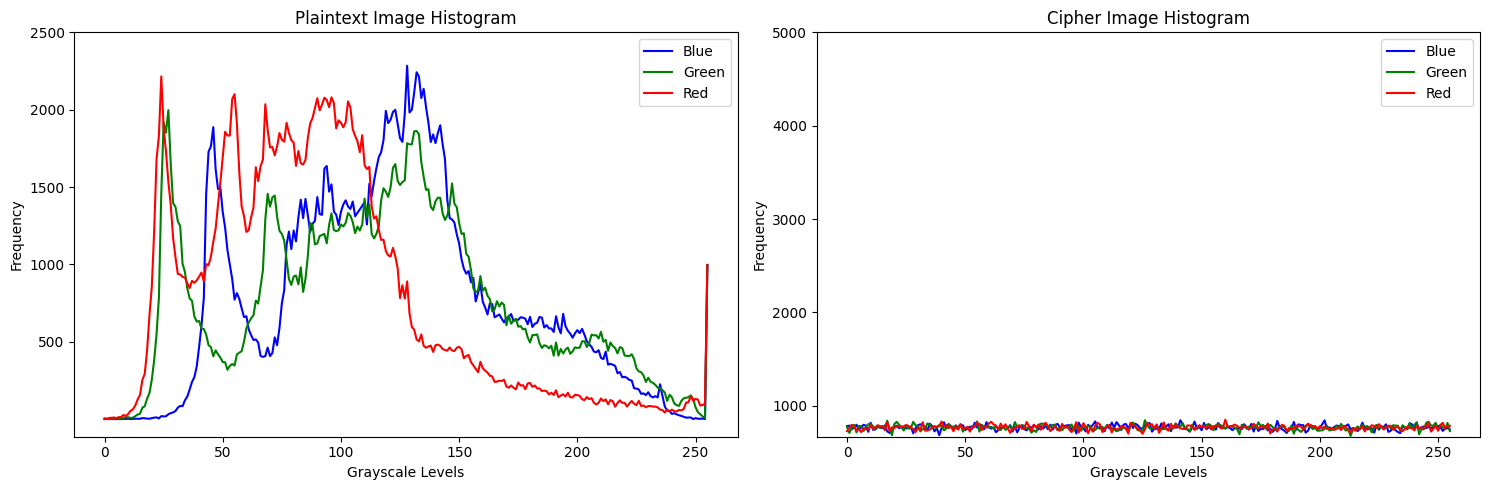

In [ ]:
import cv2
import matplotlib.pyplot as plt


def plot_color_histogram(image, title, color):
    # Split the color image into its Red, Green, and Blue channels
    b, g, r = cv2.split(image)

    # Calculate histograms for each channel
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Plot the histograms for each channel
    plt.plot(hist_b, color='blue', label='Blue')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_r, color='red', label='Red')
    plt.title(title)
    plt.xlabel("Grayscale Levels")
    plt.ylabel("Frequency")
    plt.legend()

    # Set the y-ticks to multiples of 10000
    plt.yticks([500 * i for i in range(1, 6)])

def plot_color_histogram1(image, title, color):
    # Split the color image into its Red, Green, and Blue channels
    b, g, r = cv2.split(image)

    # Calculate histograms for each channel
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Plot the histograms for each channel
    plt.plot(hist_b, color='blue', label='Blue')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_r, color='red', label='Red')
    plt.title(title)
    plt.xlabel("Grayscale Levels")
    plt.ylabel("Frequency")
    plt.legend()

    # Set the y-ticks to multiples of 10000
    plt.yticks([1000 * i for i in range(1, 6)])

if __name__ == "__main__":
    # Load the color plaintext and cipher images
    plaintext_image = cv2.imread("/content/bwimages.jpg")
    cipher_image = cv2.imread("/content/4_final_encrypted_img.png")

    # Create subplots for the color histograms
    plt.figure(figsize=(15, 5))

    plt.subplot(121)
    plot_color_histogram(plaintext_image, "Plaintext Image Histogram", color="blue")

    plt.subplot(122)
    plot_color_histogram1(cipher_image, "Cipher Image Histogram", color="red")

    plt.tight_layout()
    plt.show()


In [ ]:
import cv2
import numpy as np

def calculate_entropy(image):
    # Calculate the entropy for each color channel (Red, Green, Blue)
    entropy_channels = []
    for channel in cv2.split(image):
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        hist = hist.flatten() / (image.shape[0] * image.shape[1])  # Normalize the histogram to probabilities
        non_zero_probs = hist[hist > 0]
        entropy = -np.sum(non_zero_probs * np.log2(non_zero_probs))
        entropy_channels.append(entropy)

    # Calculate the overall entropy as the average of the channel entropies
    overall_entropy = sum(entropy_channels) / 3

    return overall_entropy

if __name__ == "__main__":
    # Load the color image for which you want to calculate entropy
    color_image = cv2.imread("/content/4_final_encrypted_img.png")

    # Calculate the entropy of the color image
    entropy = calculate_entropy(color_image)

    # Print the entropy value
    print(f"Entropy of the color image: {entropy}")


Entropy of the color image: 7.999043797261791
